In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold


In [3]:
## Load the dataset
flight_delay = pd.read_csv("M1_final.csv")
flight_delay.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [4]:
## check the info
flight_delay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [74]:
flight_delay.drop_duplicates(inplace=True)


In [75]:
flight_delay.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


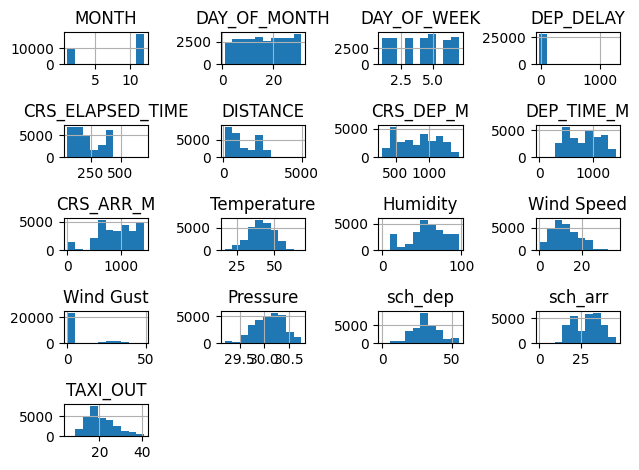

In [201]:
flight_delay.hist()
plt.tight_layout()

In [79]:
## selecting dew point for analysing taxi out delay
fd = flight_delay[["Dew Point", "TAXI_OUT"]].head(10)
fd

,Dew Point,TAXI_OUT
0,34,14
1,34,15
2,34,22
3,34,12
4,32,13
5,32,21
6,32,26
7,32,11
8,32,25
9,32,29


C:\Users\User\AppData\Local\Temp\ipykernel_16320\288860568.py:3: UserWarning: 
The palette list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


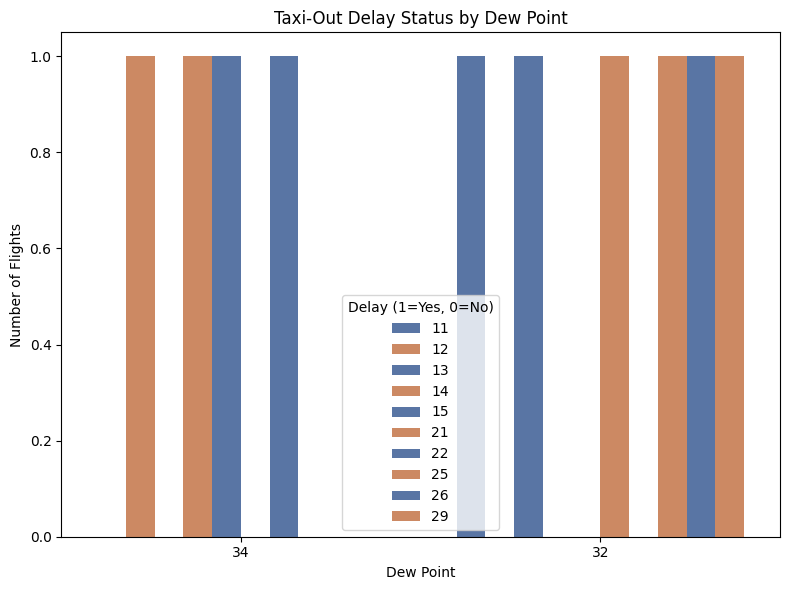

In [80]:

plt.figure(figsize=(8, 6))

sns.countplot(
    data=fd,
    x='Dew Point',
    hue='TAXI_OUT',
    palette=['#4c72b0', '#dd8452']
)

plt.title('Taxi-Out Delay Status by Dew Point')
plt.xlabel('Dew Point')
plt.ylabel('Number of Flights')
plt.legend(title='Delay (1=Yes, 0=No)')
plt.tight_layout()
plt.show()

In [81]:
## selecting humidity for analysing taxi out delay
humidity = flight_delay[["Humidity", "TAXI_OUT"]].head(10)
humidity

,Humidity,TAXI_OUT
0,58,14
1,58,15
2,58,22
3,58,12
4,58,13
5,58,21
6,58,26
7,58,11
8,58,25
9,58,29


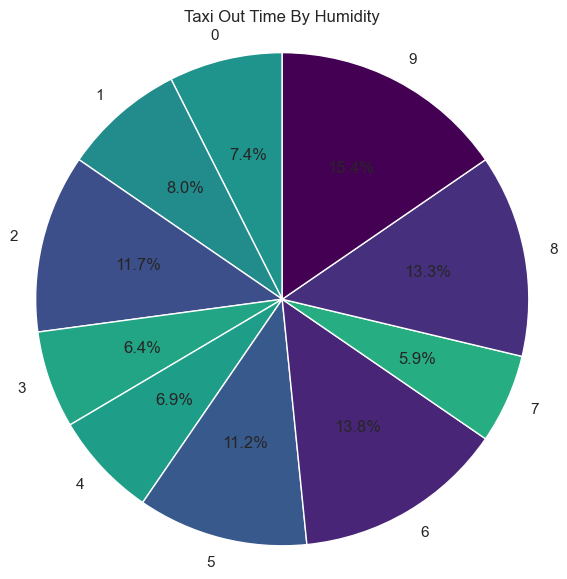

In [249]:
# Create the DataFrame
df = pd.DataFrame({
    'Humidity': [58]*10,
    'TAXI_OUT': [14, 15, 22, 12, 13, 21, 26, 11, 25, 29]
})

# Create pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    df['TAXI_OUT'], 
    labels=df.index,  # label by index or create custom labels
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.viridis_r(df['TAXI_OUT'] / max(df['TAXI_OUT']))
)

# Add title
plt.title('Taxi Out Time By Humidity')
plt.axis('equal')  # Makes the pie chart a circle
plt.show()

In [84]:
## selecting Wind speed for analysing taxi out delay
wspeed = flight_delay[["Wind Speed", "TAXI_OUT"]].head(10)
wspeed

,Wind Speed,TAXI_OUT
0,25,14
1,25,15
2,25,22
3,25,12
4,24,13
5,24,21
6,24,26
7,24,11
8,24,25
9,24,29


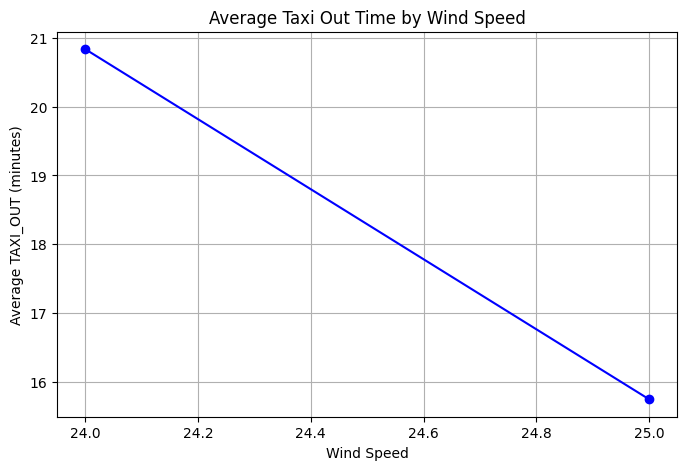

In [86]:


data = {
    'Wind Speed': [25, 25, 25, 25, 24, 24, 24, 24, 24, 24],
    'TAXI_OUT':    [14, 15, 22, 12, 13, 21, 26, 11, 25, 29]
}

df = pd.DataFrame(data)

# Since Wind Speed repeats, let's aggregate TAXI_OUT by Wind Speed, e.g., mean TAXI_OUT per Wind Speed
agg_df = df.groupby('Wind Speed')['TAXI_OUT'].mean().reset_index()

# Plotting the line graph
plt.figure(figsize=(8,5))
plt.plot(agg_df['Wind Speed'], agg_df['TAXI_OUT'], marker='o', linestyle='-', color='b')

plt.title('Average Taxi Out Time by Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Average TAXI_OUT (minutes)')
plt.grid(True)
plt.show()

In [87]:
flight_delay

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,B6,N216JB,ORH,2,57,150,1370,...,38,96,N,6,0,30.18,Cloudy,20,32,19
28816,1,31,5,AA,N104NN,BOS,2,75,187,1390,...,38,96,N,6,0,30.18,Cloudy,19,23,22
28817,1,31,5,AS,N581AS,SEA,283,392,2422,1125,...,38,96,N,6,0,30.18,Cloudy,19,23,21
28818,1,31,5,B6,N957JB,SJU,5,224,1598,1417,...,38,96,N,6,0,30.18,Cloudy,19,23,13


In [88]:
flight_delay['DAY_OF_MONTH'].value_counts()

DAY_OF_MONTH
20    1030
27    1030
13    1025
10    1018
15    1016
22    1009
26    1003
12    1002
17    1001
21     995
8      994
23     987
6      974
4      962
14     954
7      950
24     945
29     937
30     927
16     918
5      905
9      904
28     897
19     891
3      888
25     878
11     841
1      814
2      762
18     731
31     632
Name: count, dtype: int64

In [89]:
flight_delay.head(100)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,11,1,5,DL,N175DN,LAX,21,360,2475,595,...,32,43,W,21,33,30.05,Fair / Windy,16,19,15
96,11,1,5,DL,N876DN,LAS,-5,343,2248,625,...,32,43,W,21,33,30.05,Fair / Windy,16,19,17
97,11,1,5,9E,N927EV,BWI,106,86,184,520,...,32,43,W,21,33,30.05,Fair / Windy,16,19,19
98,11,1,5,MQ,N846AE,CLE,-3,108,425,629,...,32,43,W,21,33,30.05,Fair / Windy,16,19,20


In [153]:
flight_delay.index = flight_delay.iloc[:, 0]
X = flight_delay.iloc[:, 16:18].values
y = flight_delay.iloc[:, 22].values

In [154]:
X

array([[25, 38],
       [25, 38],
       [25, 38],
       ...,
       [ 6,  0],
       [ 6,  0],
       [ 6,  0]], shape=(28820, 2))

In [155]:
y

array([14, 15, 22, ..., 21, 13, 15], shape=(28820,))

In [171]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [172]:
y_pred = lin_reg.predict(X)
y_pred

array([22.64212246, 22.64212246, 22.64212246, ..., 20.59334544,
       20.59334544, 20.59334544], shape=(28820,))

In [173]:
predicted = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})
predicted

,Actual,Predicted
0,14,22.642122
1,15,22.642122
2,22,22.642122
3,12,22.642122
4,13,22.475764
...,...,...
28815,19,20.593345
28816,22,20.593345
28817,21,20.593345
28818,13,20.593345


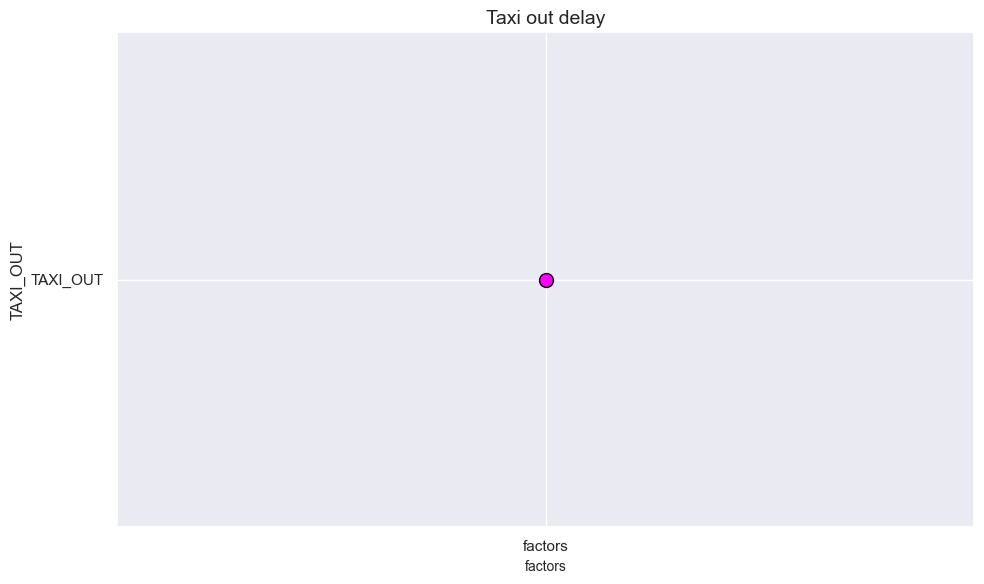

In [248]:
factors = ["Actual", "Predicted"]
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the scatter plot
ax.scatter("factors", "TAXI_OUT", color='magenta', edgecolor='black', s=100)

# Adding title and labels
ax.set_title("Taxi out delay", fontsize=14)
ax.set_xlabel("factors", fontsize=10)
ax.set_ylabel("TAXI_OUT", fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=360)

# Display the plot
plt.tight_layout()
plt.show()

In [202]:
sns.set_theme(color_codes=True)

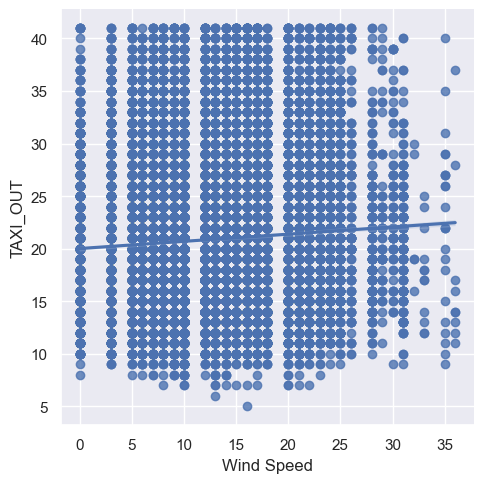

In [209]:
sns.lmplot(x="Wind Speed", y="TAXI_OUT", data=flight_delay)

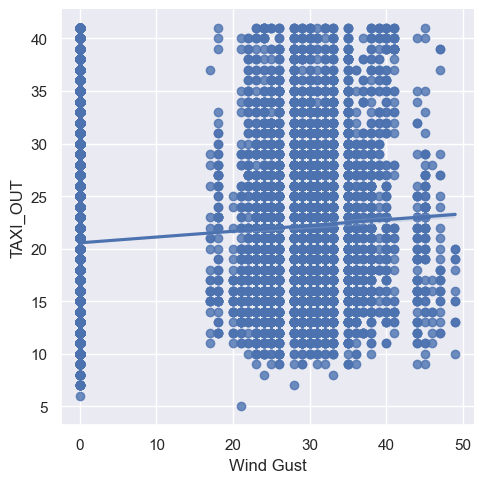

In [210]:
sns.lmplot(x="Wind Gust", y="TAXI_OUT", data=flight_delay)

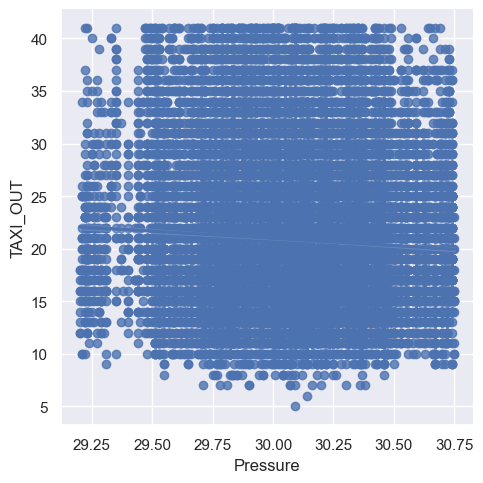

In [211]:
sns.lmplot(x="Pressure", y="TAXI_OUT", data=flight_delay)

In [181]:
## define our model
model_lasso = Lasso(alpha=0.10)
model_ridge = Ridge(alpha=0.10)

In [157]:
## fit the model
model_lasso.fit(X, y)
model_ridge.fit(X, y)

,alpha,0.1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [159]:
## define the data that will be used for prediction
new = flight_delay.iloc[28819, 16:18]

In [160]:
pred_lasso = model_lasso.predict([new])
pred_lasso

array([np.float64(20.56769381475758)], dtype=object)

In [161]:
pred_ridge = model_ridge.predict([new])
pred_ridge

array([np.float64(20.593345428135056)], dtype=object)

In [242]:
## tunning alpha
cv = RepeatedKFold(n_splits = 5, n_repeats = 5, random_state = 1)

##define the model
model = RidgeCV(alphas=(0.1, 1.0, 0.01), cv=cv, scoring = 'neg_mean_absolute_error')

##fit the model
model.fit(X, y)
##summerize the chosen configuration
print('alpha: %f' %model.alpha_)

alpha: 0.010000
